## [Tailless Aircraft in theory and practice](https://www.abebooks.co.uk/servlet/SearchResults?sts=t&isbn=0-340-61402-1)

### Chapter 2.7 The Swept Tapered wing as a model wing


In [1]:
#Tailless Aircraft in theory and practice
# Chapter 2.7 The Swept Tapered wing as a model wing

from matplotlib import pyplot as plt
%matplotlib inline
import sympy as sp
import math
from sympy.interactive import printing
from IPython.display import display
#printing.init_printing(use_latex=True)
printing.init_printing(use_latex='mathjax')


![alt text](files/wingsp42.png "p42")

In [2]:
# general wing geometry definitions
x = sp.Symbol("x", real=True)    # along chord
y = sp.Symbol("y", real=True)    # along wingspan
s = sp.Symbol("s", positive=True)     # wingspan is y = -s to +s

# Wing is symmetric, but sympy is bad at handling abs(),
# so expressions will be given in half-integrals, from 0 to s
# instead of from -s to s
l = sp.Function("l")(y)     # wing chord length
c_l = sp.Function("c_l")(y) # wing chord length
h = sp.Function("h")(y)     # distance of neutral point from y-axis
S = sp.Symbol("S")          # wing area
lam = sp.Symbol("lambda")   # aspect ratio
c_L = sp.Symbol("c_L")      # overall lift coefficient

eq_S = sp.Eq(S, 2*sp.integrate(l, (y, 0, s))) # (2.2.1)
eq_lam = sp.Eq(lam, (2*s)**2/S) # (2.2.1)
eq_c_L = sp.Eq(c_L, (1/S) * 2*sp.integrate(c_l*l, (y, 0, s))) # (2.2.5) 

display(eq_S)
display(eq_lam)
display(eq_c_L)

      s        
      ⌠        
S = 2⋅⎮ l(y) dy
      ⌡        
      0        

       2
    4⋅s 
λ = ────
     S  

        s              
        ⌠              
      2⋅⎮ cₗ(y)⋅l(y) dy
        ⌡              
        0              
c_L = ─────────────────
              S        

![alt text](files/wingsp45.png "p45")

In [3]:
l_mu = sp.Symbol("l_mu")      # aerodynamic mean chord
eq_l_mu = sp.Eq(l_mu, (2/S)*sp.integrate(l**2, (y, 0, s)))
display(eq_l_mu)

        s         
        ⌠         
        ⎮  2      
      2⋅⎮ l (y) dy
        ⌡         
        0         
lₘᵤ = ────────────
           S      

In [4]:
gamma = sp.Function("gamma")(y)     # local lift density
eq_gamma = sp.Eq(gamma, c_l*l)      # (2.2.4)

gamma_E = sp.Function("gamma_E")(y) # Elliptical lift distribution
eq_gamma_E = sp.Eq(gamma_E, 8/(sp.pi*lam)*c_L*sp.sqrt(s**2 - y**2)) # (2.3.4)

display(eq_gamma)
display(eq_gamma_E)


γ(y) = cₗ(y)⋅l(y)

                  _________
                 ╱  2    2 
         8⋅c_L⋅╲╱  s  - y  
γ_E(y) = ──────────────────
                π⋅λ        

In [5]:
# perform substitution for gamma_E (a value of gamma)
display("proof that the following is right", eq_gamma_E)
display(eq_c_L.rhs.replace(eq_gamma.rhs, eq_gamma_E.rhs).\
                   replace(eq_lam.lhs, eq_lam.rhs).doit(), 
        "is", eq_c_L.lhs)

'proof that the following is right'

                  _________
                 ╱  2    2 
         8⋅c_L⋅╲╱  s  - y  
γ_E(y) = ──────────────────
                π⋅λ        

c_L

'is'

c_L

![alt text](files/wingsp74.png "p74")

In [6]:
x_gamma = sp.Symbol("x_gamma")(y)  # centre of lift
eq_x_gamma = sp.Eq(x_gamma, 2*sp.integrate(gamma*h, (y, 0, s))/(c_L*S)) # (2.6.1)
display(eq_x_gamma) 

x_E = sp.Symbol("x_E")   # E-point, centre of lift for elliptic distribution
eq_x_E = sp.Eq(x_E, eq_x_gamma.rhs.replace(eq_gamma.lhs, eq_gamma_E.rhs).doit())  # (2.6.1)
display(eq_x_E)

x_C = sp.Symbol("x_C")   # C-point, centre of lift for constant distribution
eq_x_C = sp.Eq(x_C, 
               eq_x_gamma.rhs.replace(eq_gamma.lhs, eq_gamma.rhs).\
               replace(eq_c_L.lhs, eq_c_L.rhs).\
               replace(c_l, 1).replace(eq_S.rhs/2, eq_S.lhs/2)) # (2.6.2)
display(eq_x_C)

          s             
          ⌠             
        2⋅⎮ γ(y)⋅h(y) dy
          ⌡             
          0             
xᵧ(y) = ────────────────
             S⋅c_L      

         s                     
         ⌠                     
         ⎮    _________        
         ⎮   ╱  2    2         
      16⋅⎮ ╲╱  s  - y  ⋅h(y) dy
         ⌡                     
         0                     
x_E = ─────────────────────────
                π⋅S⋅λ          

        s             
        ⌠             
      2⋅⎮ h(y)⋅l(y) dy
        ⌡             
        0             
x_C = ────────────────
             S        

## Special case of trapezoidal wing

![alt text](files/wingsp75.png "p75")

In [7]:
# Special case of trapizoidal wing
H = sp.Symbol("H", positive=True)  # lever edge sweep
phi_N = sp.Symbol("phi_N")
eq_phi_N = sp.Eq(phi_N, sp.atan(H/s))
display(eq_phi_N)
l0 = l.subs(y, 0)   # chord length at root
ls = l.subs(y, s)   # chord length at tip
Z = sp.Symbol("Z")  # taper ratio
eq_Z = sp.Eq(Z, ls/l0)  # (2.7.1)
display(eq_Z)

          ⎛H⎞
φ_N = atan⎜─⎟
          ⎝s⎠

    l(s)
Z = ────
    l(0)

![alt text](files/wingsp76.png "p76")

In [8]:
lH = l0 + (ls - l0)*y/s  # Horten value of l
hH = H*y/s + lH/4        # Horten value of h

SH = eq_S.rhs.replace(l, lH).doit().simplify()
print(SH - s*(ls + l0))  # (2.7.2)
P = sp.Symbol("P")       # Pfeilmass
eq_P = sp.Eq(P, (hH.subs(y,s) - hH.subs(y,0))/2)
print(eq_P.rhs - (1/8)*(4*H + ls - l0))  # (2.7.3)

x_EH = l0/4 + 8*P/(3*sp.pi)   # (2.7.4)
print((eq_x_E.rhs.replace(h, hH).\
      replace(eq_lam.lhs, eq_lam.rhs).\
      replace(S, SH).doit() - x_EH.replace(P, eq_P.rhs)).simplify())

0
0
0


In [9]:
# Problem with C-point
x_CH = eq_x_C.rhs.replace(l, lH).replace(h, hH).replace(S, SH).doit().\
        replace(H, sp.solve(eq_P, H)[0]).\
        replace(ls, l0*Z).simplify()

print((x_CH - (l0/4 + (2*P*(2*Z + 1)/3/(Z+1)))).simplify())

# WRONG:
x_CHwritten = (l0/4 + (2*P*(2*Z + 1)/(Z+1)))  # (2.7.5)

0


![alt text](files/wingsp77.png "p77")

In [10]:
l_muH = eq_l_mu.rhs.replace(l, lH).replace(S, SH).replace(ls, l0*Z).doit().simplify()
display(l_muH)  # (2.7.6)

  ⎛ 2        ⎞     
2⋅⎝Z  + Z + 1⎠⋅l(0)
───────────────────
     3⋅(Z + 1)     

In [11]:
# Need to make graph on p81 with lam=10 and varying Z
egraph = ((x_EH - l0/4)/(2*P)).simplify()
egraph, float(egraph)


⎛ 4                     ⎞
⎜───, 0.4244131815783876⎟
⎝3⋅π                    ⎠

![alt text](files/wingsp81.png "p81")

 2⋅Z + 1 
─────────
3⋅(Z + 1)

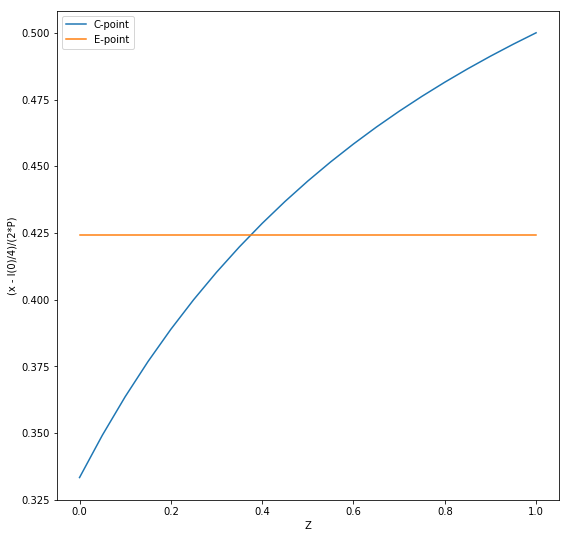

In [26]:
# works if you put in correct x_CH into graph
cgraph = ((x_CH - l0/4)/(2*P)).simplify()
display(cgraph)

import numpy
from matplotlib import pyplot as plt
%matplotlib inline

Zs = numpy.linspace(0, 1, 21)
Cs = [ float(cgraph.subs(Z, Zval))  for Zval in Zs ]
plt.figure(facecolor="white", figsize=(9,9))
plt.plot(Zs, Cs, label="C-point")
plt.plot(Zs, [egraph]*len(Zs), label="E-point")
plt.xlabel("Z")
plt.ylabel("(x - l(0)/4)/(2*P)");
plt.legend();

In [13]:
# For bonus hard case, calculate the neutral point x_N 
alpha = sp.Symbol("alpha")
c_lalpha = sp.Function("c_l^alpha")(y)  # stands for dc_l/dalpha
x_N = sp.Symbol("x_N")  # (2.2.10)
eq_x_N = sp.Eq(x_N, sp.integrate(c_lalpha*l*h, (y, 0, s))/sp.integrate(c_lalpha*l, (y, 0, s)))
eq_x_N

      s                       
      ⌠                       
      ⎮ c_l__α(y)⋅h(y)⋅l(y) dy
      ⌡                       
      0                       
x_N = ────────────────────────
        s                     
        ⌠                     
        ⎮ c_l__α(y)⋅l(y) dy   
        ⌡                     
        0                     

In [14]:
# substitute the H values and assume c_lalpha is constant
x_NH = eq_x_N.rhs.replace(h, hH).replace(l, lH).doit().simplify()
#display(x_NH)
display("We assume that c_lapha is constant and cancels out")
x_NHconstalpha = x_NH.replace(c_lalpha, 1).doit().simplify()
display(x_NHconstalpha)

'We assume that c_lapha is constant and cancels out'

                       2                   2   
2⋅H⋅l(0) + 4⋅H⋅l(s) + l (0) + l(0)⋅l(s) + l (s)
───────────────────────────────────────────────
                6⋅(l(0) + l(s))                

In [15]:
# solve the lambda=10 case
l0H = sp.solve((eq_lam.rhs - 10).replace(S, SH).replace(ls, l0*Z), l0)[0]
Nvalms = x_NHconstalpha.replace(ls, Z*l0).\
         replace(H, sp.solve(eq_phi_N, H)[0]).\
         replace(l0, l0H).simplify()
Nval = Nvalms/s
Nval

 2                                       
Z  + Z + 5⋅(Z + 1)⋅(2⋅Z + 1)⋅tan(φ_N) + 1
─────────────────────────────────────────
                         2               
               15⋅(Z + 1)                

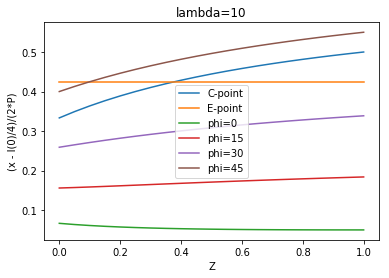

In [16]:
plt.plot(Zs, Cs, label="C-point")
plt.plot(Zs, [egraph]*len(Zs), label="E-point")
plt.xlabel("Z")
plt.ylabel("(x - l(0)/4)/(2*P)");

for phi in [0, 15, 30, 45]:
    Ns = [ float(Nval.subs(Z, Zval).subs(phi_N, math.radians(phi)))  for Zval in Zs ]
    plt.plot(Zs, Ns, label="phi=%d"%phi)
plt.title("lambda=10")
plt.legend();


### Also fails on Figure 2.7.4
![alt text](files/wingsp81b.png "p81b")

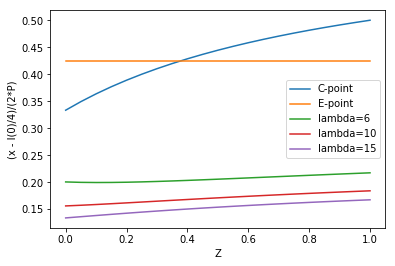

In [17]:
plt.plot(Zs, Cs, label="C-point")
plt.plot(Zs, [egraph]*len(Zs), label="E-point")
plt.xlabel("Z")
plt.ylabel("(x - l(0)/4)/(2*P)");

for lamval in [6, 10, 15]:
    l0H = sp.solve((eq_lam.rhs - lamval).replace(S, SH).replace(ls, l0*Z), l0)[0]
    Nvalms = x_NHconstalpha.replace(ls, Z*l0).\
             replace(H, sp.solve(eq_phi_N, H)[0]).\
             replace(l0, l0H).simplify()
    Nval = Nvalms/s
    Nval
    Ns = [ float(Nval.subs(Z, Zval).subs(phi_N, math.radians(15)))  for Zval in Zs ]
    plt.plot(Zs, Ns, label="lambda=%d"%lamval)

plt.legend();


In [ ]:
y = "Liverpool	 4.8 	 4.1 	 3.7 	 3.7 	 4.0 	 4.1 	 4.1 	 4.1 	 4.1 	 4.0 	 4.3 	 4.2 	 4.2 	 4.4 	 4.2 	 4.5 	 4.3 	 4.6 	 4.4 	 4.7 	 4.5 	 4.8 	 4.7 	 4.9 	 5.0 	 6.3 	 6.3 	 7.6 	 7.4 	 7.4 	 8.2 	 8.1 	 8.2 	 8.6 	 8.4"
x = "2016	2017	2018	2019	2020	2021	2022	2023	2024	2025	2026	2027	2028	2029	2030	2031	2032	2033	2034	2035	2036	2037	2038	2039	2040	2041	2042	2043	2044	2045	2046	2047	2048	2049	2050"

